# Optimizers & it's types: [3RD JUNE 2025]


## Optimizers:

- These adjust the weights of the model based on gradient of loss function, aiming to minimize the loss & improve model accuracy.

- Basically these are iterative procedures.

- Here gradient means taking partial derivatives of the given function...

- Tensorflow optimizers library: `tf.keras.optimizers`

- PyTorch optimizers lib.: `torch.optim`

### Cost/Loss Functions:

- These are the functions to calculate the error of a model's prediction for single data point. Common Cost functions are as follow:

1. Regression Loss funcs:
    - MSE : `sum[(actual - predicted)^2] / size`
    - MAE : `sum[abs(actual - predicted)] / size`
    - MBE : `sum(actual - predicted) / size`       

2. Classification Loss funcs:
    - Cross-Entropy [log] Loss: `-1*[actual*log(predicted) + (1 - actual)*log(1 - predicted)]` 
    - Hinge [SVM] Loss: `sum[max(0, 1 - actual*predicted)] / size` 

## Types of Optimizers:

1. Gradient Descent [Stochastic Gradient Descent]
2. Adagrad [Adaptive Gradient Descent]
3. RMSprop [Root Mean Sqre Propogation]
4. Adam [Adaptive Moment Estimation]


src: [analyticsvidhya 🔗](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/)

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Gradient Descent & Stochastic GD.:

**Gradient Descent:**
- Optimization algorithm that modifies the values to achieve the local minimum. 
- `X_new = X - alpha * f'(x)`
- `w = w - lr * f'(w)`
- Key NOTE: Takes equal size of steps. So slow convergence.

**Stochastic Gradient Descent:**

- Stochastic means randomness.
- It is similar to normal GD, but we add some random noise here 
- `X_new = X - alpha * [f'(x) + random_noise]`
- `w = w - lr * [f'(w) + np.random.normal(0,0.1)]`
- Key NOTE: Due to noise the step size are not of equal size. So leads to faster convergence.


In [29]:
def gradient_descent(
    w, # weight
    learning_rate, # alpha
    gradient_w # gradient of weight
):
    return w - learning_rate * gradient_w

def SGD(
    w, 
    learning_rate, 
    gradient_w
):
    noise = np.random.normal(0,0.1) #randomness
    return w - learning_rate * (gradient_w + noise)

### 2. Adagrad (Adaptive Gradient Descent):

- Uses different learning_rates for each iteration unlike above one.
- changes in lr depends on params during the training.
- `w = w - (n / sqrt(alpha + E)) * f'(x)`
- n is constant, E is small +ve to avoid 0 division error, alpha is different gradients square at each iteration.
- Weights get smaller steps over time (Good for sparse data).

In [5]:
def Adagrad(
    w,
    learning_rate,
    gradient_w,
    cache
):
    cache += gradient_w**2
    E = 1e-8
    return w - learning_rate * gradient_w / (np.sqrt(cache) + E) , cache #iterative so need to store the past gradients square


### 3. RMSProp (Root Mean Square):

- Uses moving average of past gradients to control how fast we learn.
- Similar to Adagrad but uses exponentially decaying average of past gradient squares...

- `w = w - [ n / sqrt(G) * f'(x)]`
- where `G = (gamma * G_prev) + (1 - gamma)*(f'(X))^2`

In [6]:
def RMSProp(
    w, 
    learning_rate, 
    gradient_w,
    cache, # prev gradient_w
    decay_rate = 0.8, # gamma
):
    cache = (decay_rate * cache) + (1 - decay_rate) * (cache**2)
    E = 1e-8
    return w - learning_rate * gradient_w / (np.sqrt(cache) + E), cache
     

### 4. Adam (Adaptive Moment Estimation):

- Best & widely used optimizer.
- Tracks both: Momentum (mean of gradient) & RMS (variance of gradient).
- Fast convergence, robust to noisy data, widely used in deep learning.

```
moments:
    m = beta1 * m + (1 - beta1) * grad_w
    v = beta2 * v + (1 - beta2) * grad_w^2

    beta1 & beta2 -> decay rate of average gradient

bias:
    m_bias = m / (1 - beta1)
    v_bias = v / (1 - beta2)


w = w - alpha * m_bias / (sqrt(v_bias) + E)

E - small positive to avoid zero division error

```

In [7]:
def Adam(
    w,
    learning_rate,
    gradient_w,
    m, v,  # iterative...
    beta1, beta2,
    t=1, 
):
    m = beta1 * m + (1-beta1) * gradient_w
    v = beta2 * v + (1-beta2) * (gradient_w**2)
    
    m_bias = m / (1-beta1**t)
    v_bias = v / (1- beta2**t)
    
    E = 1e-8
    
    return w - learning_rate * m_bias / (np.sqrt(v_bias) + E) , m, v

In [46]:
lr = 0.001
loss = np.random.rand(1)
init = np.random.rand(1)
loss, init

(array([0.07510634]), array([0.03962068]))

In [47]:
loss_list = []
loss_list.append(loss)
for epoch in range(10):
    loss = loss - lr * init if epoch == 0 else loss
    loss_list.append(loss)

In [48]:
losses = np.array(loss_list)

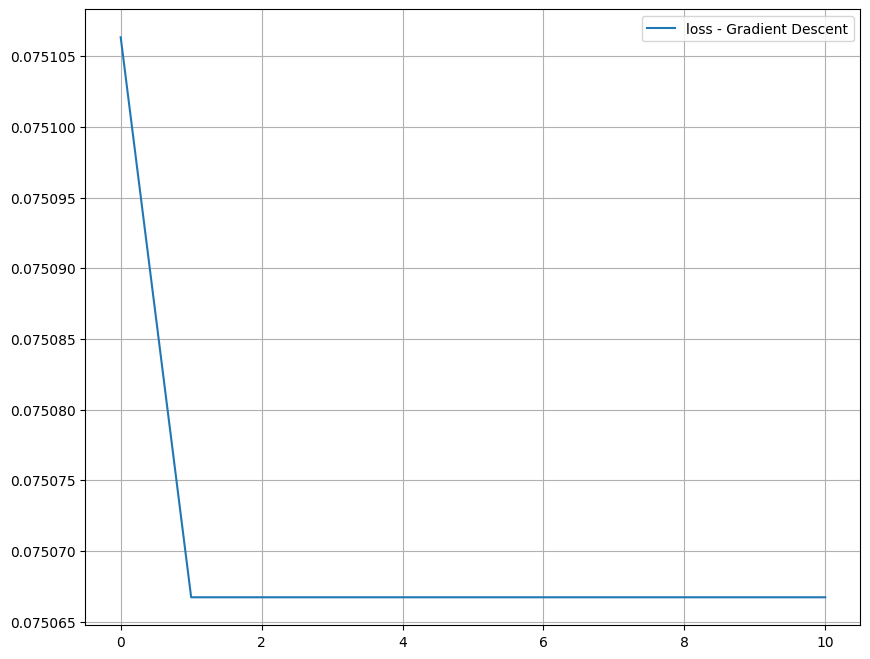

In [49]:
plt.figure(figsize=(10,8))
plt.plot(loss_list, label='loss - Gradient Descent')
plt.plot(loss)
plt.legend()
plt.grid(True)
plt.show()